In [1]:
from hashlib import md5
import pandas as pd
import json
import statsmodels.api as sm
import numpy as np
from sklearn import datasets
from random import randint, random

In [24]:
objs = []
for i in range(0,1000):
    obj = {}
    obj['SchoolSize'] = randint(200,1000)
    obj['SchoolVisits'] = round(randint(1,50)*obj['SchoolSize']/randint(1000,2000))
    obj['CulturalCenterVisits'] = randint(0,10)
    obj['TeacherEmails'] = randint(30,300)
    obj['Webinars'] = randint(0,20)
    obj['YESApplicants'] = obj['SchoolSize']*random()/2 + 2*obj['SchoolVisits'] + randint(1,2)*obj['CulturalCenterVisits'] + 0.7*obj['TeacherEmails'] - 0.05*obj['Webinars']
    if obj['YESApplicants'] > obj['SchoolSize']:
        delta = obj['YESApplicants'] - obj['SchoolSize']
        obj['YESApplicants'] = obj['YESApplicants'] - (delta * ( 1 + random() ))
    obj['YESApplicants'] = int(round(obj['YESApplicants']))
    objs.append(obj)

In [25]:
df = pd.DataFrame(objs)
y = df[['YESApplicants']]
x = df[['SchoolSize','SchoolVisits','CulturalCenterVisits','TeacherEmails','Webinars']]

In [26]:
df.describe()

,CulturalCenterVisits,SchoolSize,SchoolVisits,TeacherEmails,Webinars,YESApplicants
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,4.929000,594.843000,10.483000,167.281000,9.870000,293.60500
std,3.210649,223.916545,7.741036,77.204719,5.968813,120.56245
min,0.000000,201.000000,0.000000,30.000000,0.000000,39.00000
25%,2.000000,405.500000,4.000000,99.000000,5.000000,205.00000
50%,5.000000,589.500000,9.000000,167.000000,10.000000,271.50000
75%,8.000000,787.000000,15.000000,231.000000,15.000000,373.00000
max,10.000000,1000.000000,41.000000,300.000000,20.000000,665.00000


In [28]:
mod = sm.OLS(y,x)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          YESApplicants   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2238.
Date:                Fri, 08 Feb 2019   Prob (F-statistic):               0.00
Time:                        11:35:13   Log-Likelihood:                -5926.5
No. Observations:                1000   AIC:                         1.186e+04
Df Residuals:                     995   BIC:                         1.189e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
SchoolSize               0.2585 

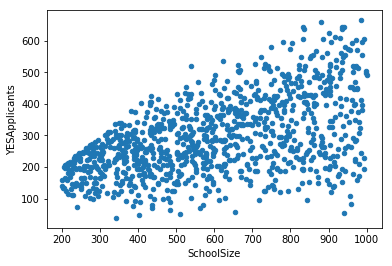

In [29]:
df.plot.scatter('SchoolSize','YESApplicants')

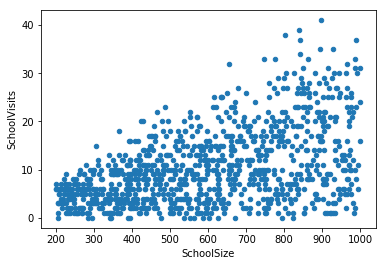

In [30]:
df.plot.scatter('SchoolSize','SchoolVisits')

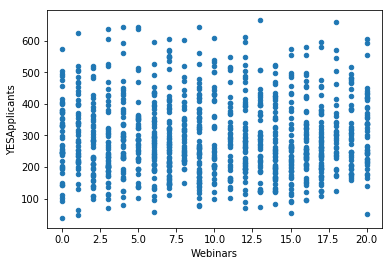

In [33]:
df.plot.scatter('Webinars','YESApplicants')

In [31]:
df.to_csv('datasets/YES_Applicants.csv',index=False)